### Import dependencies and load data

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import os
import pandas as pd
import tensorflow as tf

In [4]:
df = pd.read_csv('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


### Preprocessing data

In [5]:
# using text vectorization (converting each word into a unique vector) so that it is understandable by the model

from tensorflow.keras.layers import TextVectorization

In [6]:
##splitting data into attributes and comments

x = df['comment_text']
y = df[df.columns[2:]].values

In [7]:
## initialising the vectorizer
max_features = 100000
vectorizer = TextVectorization(max_tokens = max_features, output_sequence_length = 1800, output_mode='int')

In [8]:
vectorizer.adapt(x.values)  #making it learn and map all the words in the comments in x

2022-11-23 14:12:44.788935: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [9]:
vectorized_text = vectorizer(x.values)
vectorized_text

2022-11-23 14:13:08.551682: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2297822400 exceeds 10% of free system memory.


<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [10]:
#creating a data pipeline to handle the large amount of data
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))  #put in the data (text vectors) and the labels
dataset = dataset.cache()
dataset = dataset.shuffle(16000)
dataset = dataset.batch(16) #dividing the data into
dataset = dataset.prefetch(8)

In [11]:
#to view data
dataset.as_numpy_iterator().next()

2022-11-23 14:13:41.684874: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2297822400 exceeds 10% of free system memory.
2022-11-23 14:13:43.538177: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(array([[1242,    9,   67, ...,    0,    0,    0],
        [7503,   19,    6, ...,    0,    0,    0],
        [ 920,  218,  251, ...,    0,    0,    0],
        ...,
        [   8,  457,   38, ...,    0,    0,    0],
        [   8,  324,    2, ...,    0,    0,    0],
        [  40,  766,  469, ...,    0,    0,    0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

In [12]:
# dividing the dataset
train = dataset.take(int(len(dataset)*.7)) #taking 70%
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2)) #skipping 70% of the dataset
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))
train.as_numpy_iterator().next()

2022-11-23 14:13:44.851910: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2297822400 exceeds 10% of free system memory.
2022-11-23 14:13:46.762839: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


(array([[   12,     9,    15, ...,     0,     0,     0],
        [  270,  3868,  5085, ...,     0,     0,     0],
        [ 4083,    29,  1575, ...,     0,     0,     0],
        ...,
        [17828,  4721,  1482, ...,     0,     0,     0],
        [  292,     2,  1257, ...,     0,     0,     0],
        [   18,    61,    44, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

### Building the model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [13]:
model = Sequential() #initialising the model

#creating a mapping of the word to the vector value
# each one embedding per word, 32 values in length
model.add(Embedding(max_features+1, 32)) 

# LSTM layer = bidirectional, for RNN, useful for sentential data where previous data matters
# with 32 LSTM units, gpu-acceleration for lstm dictated by tensorflow is tanh
model.add(Bidirectional(LSTM(32, activation = 'tanh')))

# dense, fully connected layers, to extract features
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))

#final layer to map to the output (so has 6 units as no. of labels is 6)
model.add(Dense(6, activation = 'relu'))

In [14]:
# as it is a multi output model, the loss used is binarycrossentropy instead of categorycrossentropy
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          3200032   
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense (Dense)                (None, 128)               8320      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 774       
Total params: 3,258,790
Trainable params: 3,258,790
Non-trainable params: 0
____________________________________________

In [16]:
history = model.fit(train, epochs = 10, validation_data = val)

2022-11-23 14:14:15.656175: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2297822400 exceeds 10% of free system memory.
2022-11-23 14:14:17.478861: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2297822400 exceeds 10% of free system memory.


Epoch 1/10


2022-11-23 14:14:23.813649: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


6981/6981 [==============================] - 623s 88ms/step - loss: 0.3798 - val_loss: 4.8924
Epoch 2/10
6981/6981 [==============================] - 646s 93ms/step - loss: 2.8694 - val_loss: 2.6164
Epoch 3/10
6981/6981 [==============================] - 648s 93ms/step - loss: 2.6172 - val_loss: 2.6171
Epoch 4/10
6981/6981 [==============================] - 654s 94ms/step - loss: 2.6169 - val_loss: 2.6158
Epoch 5/10
6981/6981 [==============================] - 633s 91ms/step - loss: 2.6173 - val_loss: 2.6167
Epoch 6/10
6981/6981 [==============================] - 660s 95ms/step - loss: 2.6163 - val_loss: 2.6198
Epoch 7/10
6833/6981 [============================>.] - ETA: 12s - loss: 2.6179

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6981/6981 [==============================] - 657s 94ms/step - loss: 2.6148 - val_loss: 2.6126
Epoch 9/10
6981/6981 [==============================] - 658s 94ms/step - loss: 2.6169 - val_loss: 2.6190
Epoch 10/10
6981/6981 [==============================] - 658s 94ms/step - loss: 2.6159 - val_loss: 2.6239


<Figure size 720x360 with 0 Axes>

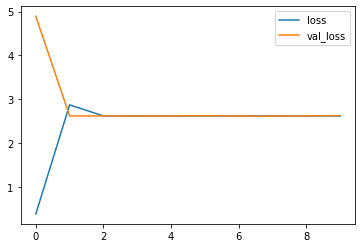

In [17]:
plt.figure(figsize = (10,5))
pd.DataFrame(history.history).plot()
plt.show()

In [20]:
model.save('new_model')

2022-11-23 16:07:19.095367: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [2]:
from tensorflow import keras
new_model = keras.models.load_model('new_model')
new_model.summary()

OSError: SavedModel file does not exist at: new_model/{saved_model.pbtxt|saved_model.pb}